In [8]:
import os, sys
import numpy as np
import pandas as pd
import skimage.io
from skimage.transform import resize

import matplotlib.pyplot as plt

import PIL
from PIL import Image
import cv2
import warnings
import h5py
warnings.filterwarnings("ignore")
SIZE = 512

In [2]:
# Load dataset info
DIR = '../input/'
data = pd.read_csv('../input/train.csv')

In [3]:
def getTrainDataset():
    
    path_to_train = DIR + '/train/'
    data = pd.read_csv(DIR + '/train.csv')

    paths = []
    labels = []
    
    for name, lbl in zip(data['Id'], data['Target'].str.split(' ')):
        y = np.zeros(28)
        for key in lbl:
            y[int(key)] = 1
        paths.append(os.path.join(path_to_train, name))
        labels.append(y)

    return np.array(paths), np.array(labels)

def getTestDataset():
    
    path_to_test = DIR + '/test/'
    data = pd.read_csv(DIR + '/sample_submission.csv')

    paths = []
    labels = []
    
    for name in data['Id']:
        y = np.ones(28)
        paths.append(os.path.join(path_to_test, name))
        labels.append(y)

    return np.array(paths), np.array(labels)
paths, labels = getTrainDataset()

In [4]:
labels[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
from tqdm import tqdm
hdf5_path = 'D:\Human-Protein-Atlas-Image-Classification\input\proteins.h5'

In [19]:
data = h5py.File(hdf5_path, "w")
data.create_dataset("photos", shape = (0, 512, 512, 4), maxshape = (None, 512, 512, 4)
                    #, chunks = True, compression = "gzip", compression_opts = 9
                   )
data.create_dataset("labels", shape = (0, 28), maxshape = (None, 28))

<HDF5 dataset "labels": shape (0, 28), type "<f4">

In [20]:
batch_size = 1024
x_max = 512
y_max = 512

In [21]:
channels = ["red", "blue", "green", "yellow"]
def resize_img(path):
    images = []
    for channel in channels:
        im = np.array(Image.open(path + '_' + channel + '.png'))
        images.append(im)
    im = np.stack((
                images
            ), -1)/255
    return im

In [26]:
import concurrent.futures
def data_gen(paths):
    for i in tqdm(range(0, len(paths), batch_size)):
        xs = []
        with concurrent.futures.ThreadPoolExecutor(max_workers = 16) as executor:
                for value in executor.map(resize_img, paths[i:i+batch_size]):
                    xs.append(value)
        final_images = np.array(xs)
        final_labels = labels[i:i+batch_size]
        print(final_images.shape)
        print(final_labels.shape)
        data["photos"].resize(data["photos"].len() + final_images.shape[0], axis = 0)
        data["photos"][i:i+final_images.shape[0], :, :, :] = final_images
        data["labels"].resize(data["labels"].len() + final_labels.shape[0], axis = 0)
        data["labels"][i:i+final_labels.shape[0], :] = final_labels
        
data_gen(paths)
data.close()




  0%|                                                                                           | 0/31 [00:00<?, ?it/s]

(1024, 512, 512, 4)
(1024, 28)





  3%|██▋                                                                                | 1/31 [00:32<16:10, 32.35s/it]

(1024, 512, 512, 4)
(1024, 28)





  6%|█████▎                                                                             | 2/31 [01:08<16:36, 34.35s/it]

(1024, 512, 512, 4)
(1024, 28)





 10%|████████                                                                           | 3/31 [01:40<15:37, 33.48s/it]

(1024, 512, 512, 4)
(1024, 28)





 13%|██████████▋                                                                        | 4/31 [02:06<14:12, 31.58s/it]

(1024, 512, 512, 4)
(1024, 28)





 16%|█████████████▍                                                                     | 5/31 [02:32<13:12, 30.49s/it]

(1024, 512, 512, 4)
(1024, 28)





 19%|████████████████                                                                   | 6/31 [02:57<12:19, 29.56s/it]

(1024, 512, 512, 4)
(1024, 28)





 23%|██████████████████▋                                                                | 7/31 [03:22<11:32, 28.87s/it]

(1024, 512, 512, 4)
(1024, 28)





 26%|█████████████████████▍                                                             | 8/31 [03:46<10:51, 28.32s/it]

(1024, 512, 512, 4)
(1024, 28)





 29%|████████████████████████                                                           | 9/31 [04:10<10:12, 27.86s/it]

(1024, 512, 512, 4)
(1024, 28)





 32%|██████████████████████████▍                                                       | 10/31 [04:34<09:37, 27.50s/it]

(1024, 512, 512, 4)
(1024, 28)





 35%|█████████████████████████████                                                     | 11/31 [04:59<09:03, 27.19s/it]

(1024, 512, 512, 4)
(1024, 28)





 39%|███████████████████████████████▋                                                  | 12/31 [05:23<08:31, 26.94s/it]

(1024, 512, 512, 4)
(1024, 28)





 42%|██████████████████████████████████▍                                               | 13/31 [05:47<08:01, 26.74s/it]

(1024, 512, 512, 4)
(1024, 28)





 45%|█████████████████████████████████████                                             | 14/31 [06:11<07:30, 26.51s/it]

(1024, 512, 512, 4)
(1024, 28)





 48%|███████████████████████████████████████▋                                          | 15/31 [06:38<07:04, 26.56s/it]

(1024, 512, 512, 4)
(1024, 28)





 52%|██████████████████████████████████████████▎                                       | 16/31 [07:02<06:36, 26.42s/it]

(1024, 512, 512, 4)
(1024, 28)





 55%|████████████████████████████████████████████▉                                     | 17/31 [07:27<06:08, 26.30s/it]

(1024, 512, 512, 4)
(1024, 28)





 58%|███████████████████████████████████████████████▌                                  | 18/31 [07:52<05:41, 26.24s/it]

(1024, 512, 512, 4)
(1024, 28)





 61%|██████████████████████████████████████████████████▎                               | 19/31 [08:17<05:14, 26.19s/it]

(1024, 512, 512, 4)
(1024, 28)





 65%|████████████████████████████████████████████████████▉                             | 20/31 [08:42<04:47, 26.15s/it]

(1024, 512, 512, 4)
(1024, 28)





 68%|███████████████████████████████████████████████████████▌                          | 21/31 [09:08<04:21, 26.10s/it]

(1024, 512, 512, 4)
(1024, 28)





 71%|██████████████████████████████████████████████████████████▏                       | 22/31 [09:33<03:54, 26.07s/it]

(1024, 512, 512, 4)
(1024, 28)





 74%|████████████████████████████████████████████████████████████▊                     | 23/31 [09:58<03:28, 26.03s/it]

(1024, 512, 512, 4)
(1024, 28)





 77%|███████████████████████████████████████████████████████████████▍                  | 24/31 [10:24<03:02, 26.00s/it]

(1024, 512, 512, 4)
(1024, 28)





 81%|██████████████████████████████████████████████████████████████████▏               | 25/31 [10:49<02:35, 25.98s/it]

(1024, 512, 512, 4)
(1024, 28)





 84%|████████████████████████████████████████████████████████████████████▊             | 26/31 [11:14<02:09, 25.94s/it]

(1024, 512, 512, 4)
(1024, 28)





 87%|███████████████████████████████████████████████████████████████████████▍          | 27/31 [11:40<01:43, 25.93s/it]

(1024, 512, 512, 4)
(1024, 28)





 90%|██████████████████████████████████████████████████████████████████████████        | 28/31 [12:06<01:17, 25.94s/it]

(1024, 512, 512, 4)
(1024, 28)





 94%|████████████████████████████████████████████████████████████████████████████▋     | 29/31 [12:31<00:51, 25.93s/it]

(1024, 512, 512, 4)
(1024, 28)





 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [12:57<00:25, 25.93s/it]

(352, 512, 512, 4)
(352, 28)





100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [13:08<00:00, 25.43s/it]




[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


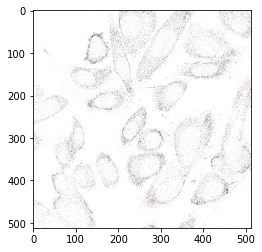

In [28]:
with h5py.File(hdf5_path, "r") as f:
    plt.imshow(f["photos"][3])
    print(f['labels'][3])

In [16]:
paths

array(['../input//train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
       '../input//train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
       '../input//train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', ...,
       '../input//train/fff189d8-bbab-11e8-b2ba-ac1f6b6435d0',
       '../input//train/fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0',
       '../input//train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0'],
      dtype='<U52')

In [29]:
%%time
for i in paths[:1000]:
    resize_img(i)

Wall time: 23.9 s


In [31]:
%%time
with h5py.File(hdf5_path, "r") as f:
    data["photos"][:1000]
    data["labels"][:1000]

ValueError: Not a location (invalid object ID)